## Cats and dogs image enhancement


In [ ]:
! pip install kaggle #it shoul be there(on local one)
import sys

# if u are in colab you have to upload your kaggle.json
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  from google.colab import files
  file = files.upload()
  file_name = next(iter(file))

# in other case put your kaggle.json in the main project dir
else: file_name = '../kaggle.json'

! mkdir -p ~/.kaggle
! echo $file_name
! cp $file_name ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

../kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-02 21:56:08          15143       1207  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9197        671  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4087        286  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Datas

In [ ]:
# download dataset
! kaggle competitions download -c dogs-vs-cats
! mkdir -p data
! unzip -qq -n dogs-vs-cats.zip -d ./
! unzip -qq -n ./train.zip -d  data
! unzip -qq -n ./test1.zip -d  data
#! rm -f dogs-vs-cats.zip

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from torch.utils.data import  DataLoader
from torch.utils.data.dataset import Dataset
from torchvision.io import read_image

import glob

from torchvision import datasets, transforms
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
class CatAndDogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.imgs_path = root_dir
        self.file_list = glob.glob(str(self.imgs_path) + "*.jpg")
        self.data = []
        for img_path in self.file_list:
            self.data.append(img_path)

        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.data[idx]
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)

        return image

In [ ]:
dataset_test = CatAndDogDataset('./data/test1/')
dataset_train = CatAndDogDataset('./data/train/')
print(len(dataset_train))

25000


In [ ]:
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

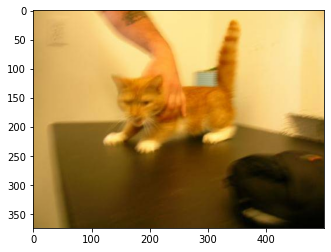

In [ ]:
imshow(dataset_train[0])